# PCA - MNIST

En éste ejercicio vamos a aplicar PCA y K-means al digits dataset similar a MNIST, que incluye imágenes de dígitos de 8x8 píxeles. La idea es intentar recopilar información sobre la distribución de las imágenes, usando visualizaciones que permitan clarificar cómo interpretar los resultados obtenidos por PCA.

### Importamos librerías

In [9]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Importamos el dataset

In [10]:
# Cargamos los datos de training
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [13]:
print('Formato de las etiquetas: {}'.format(y.shape))


Formato de las etiquetas: (1797,)


In [14]:
df = pd.DataFrame(data=X)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [16]:
clases = np.unique(y)
clases

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

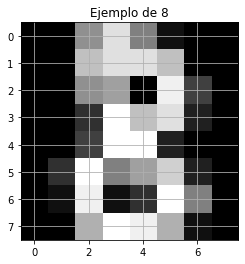

In [8]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

---

## Consignas

Siguiendo los ejemplos vistos en clase sobre los datasets de Human Activity Recognition y Fashion MNIST, realizar las siguientes consignas:

1. Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?
2. Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
3. Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].
4. Visualizar la imagen original vs. la reconstruida con los $m$ componentes del punto 1.
5. Graficar una matriz de correlación del dataset reducido.
6. Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
7. Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
8. Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
9. Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

In [115]:
# Consigna 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.9, random_state = 1).fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('se requieren {} componentes'.format(X_pca.shape[1]))

se requieren 31 componentes


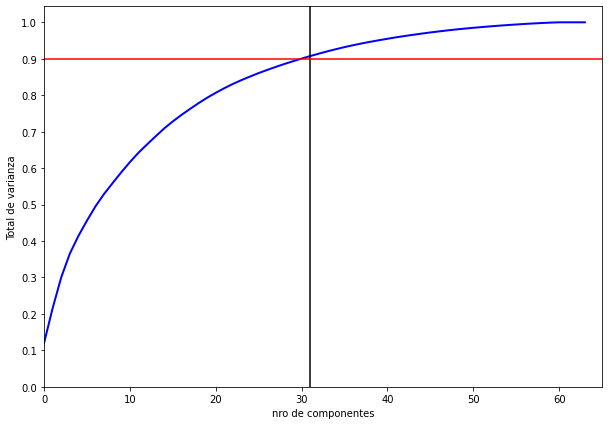

In [27]:
#Consigna 2
pca_ = PCA(n_components = 64, random_state = 1).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_.explained_variance_ratio_), color='b', lw=2)
plt.xlabel('nro de componentes')
plt.ylabel('Total de varianza')
plt.xlim(0,65)
plt.yticks(np.arange(0,1.1, 0.1))
plt.axvline(31,c='k')
plt.axhline(.9, c='r')
plt.show()

(1797, 5)


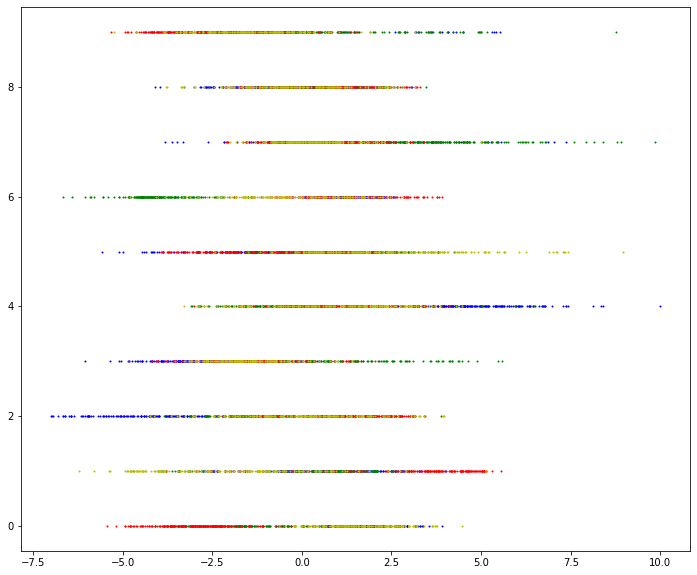

In [49]:
# Consigna 3
pca5 = PCA(n_components=5, random_state = 1).fit(X_scaled)
X_pca5 = pca5.transform(X_scaled)
plt.figure(figsize=(12,10))
#plt.scatter(X_pca5[:,0], X_pca5[:,1], c=y, edgecolor='none', alpha=.7, s=40)
#plt.colorbar()
plt.scatter(X_pca5[:,0], y, color = 'b', s=1)
plt.scatter(X_pca5[:,1], y, color = 'g', s=1)
plt.scatter(X_pca5[:,2], y, color = 'r', s=1)
plt.scatter(X_pca5[:,3], y, color = 'y', s=1)
print(X_pca5.shape)

In [51]:
# Consigna 4
pca_inverse = pca.inverse_transform(X_pca)
pca_inverse_unscaled = scaler.inverse_transform(pca_inverse)

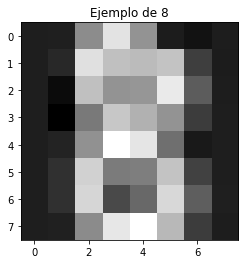

In [52]:
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(pca_inverse_unscaled[8, :].reshape((8, 8)), cmap='gray')

In [54]:
# Consigna 5
pd_pca_inverse_unscaled = pd.DataFrame(pca_inverse_unscaled)
pd_pca_inverse_unscaled.corr()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.000000,-0.119416,-0.004852,0.046669,-0.228351,-0.137541,0.003888,-0.104879,-0.033891,-0.142737,...,-0.136050,0.008190,-0.010225,-0.073391,-0.028666,0.166839,-0.031764,-0.241585,-0.269827,-0.109262
1,-0.119416,1.000000,0.612681,0.235393,-0.017982,0.072786,0.047976,-0.039563,0.033790,0.622410,...,0.042245,-0.048981,-0.010278,0.972209,0.615342,0.159433,-0.117790,-0.028590,0.029723,-0.058871
2,-0.004852,0.612681,1.000000,0.637082,-0.094244,0.047603,0.023922,-0.075047,0.021363,0.656852,...,0.060427,-0.014085,-0.024529,0.565060,0.992647,0.560691,-0.160766,-0.046754,0.093032,0.093148
3,0.046669,0.235393,0.637082,1.000000,0.037681,-0.197555,-0.171383,-0.011575,0.045649,0.364879,...,0.164440,0.094230,-0.055811,0.194364,0.638553,0.910321,-0.067539,-0.074712,0.050464,0.097484
4,-0.228351,-0.017982,-0.094244,0.037681,1.000000,0.600166,0.129926,0.011519,0.037775,0.060517,...,-0.307787,-0.260910,0.019390,-0.052093,-0.028872,0.020012,-0.069618,-0.208487,-0.263025,-0.232321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.166839,0.159433,0.560691,0.910321,0.020012,-0.100909,-0.060882,0.020793,0.054716,0.340367,...,0.106947,0.076977,-0.050472,0.123757,0.539426,1.000000,0.077388,-0.120942,-0.021365,0.120742
60,-0.031764,-0.117790,-0.160766,-0.067539,-0.069618,-0.396243,-0.457403,-0.177743,0.056333,0.004154,...,0.459604,0.076887,-0.000137,-0.134361,-0.232954,0.077388,1.000000,0.694249,0.301114,0.104853
61,-0.241585,-0.028590,-0.046754,-0.074712,-0.208487,-0.314850,-0.333282,-0.152492,0.043529,0.075452,...,0.814191,0.294750,-0.005427,-0.043770,-0.096297,-0.120942,0.694249,1.000000,0.746469,0.308499
62,-0.269827,0.029723,0.093032,0.050464,-0.263025,-0.279843,-0.192909,-0.066797,0.023766,0.121567,...,0.679850,0.623426,-0.013658,0.019695,0.045046,-0.021365,0.301114,0.746469,1.000000,0.750211


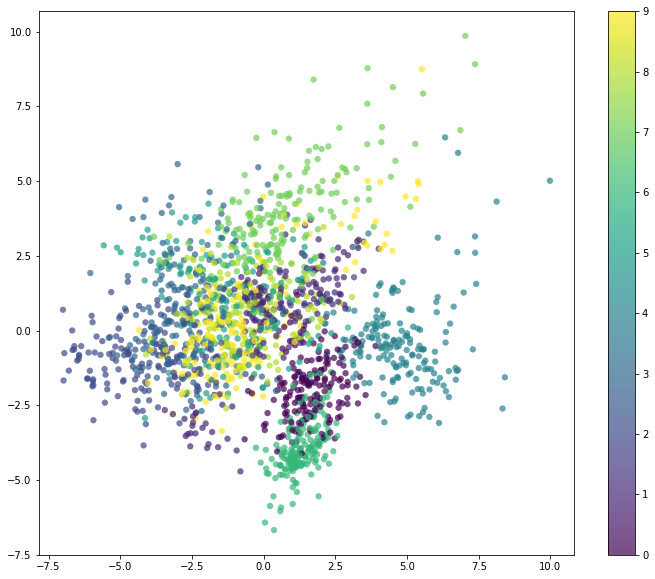

In [55]:
#Consigna 6
plt.figure(figsize=(12,10))
plt.scatter(X_pca5[:,0], X_pca5[:,1], c=y, edgecolor='none', alpha=.7, s=40)
plt.colorbar()

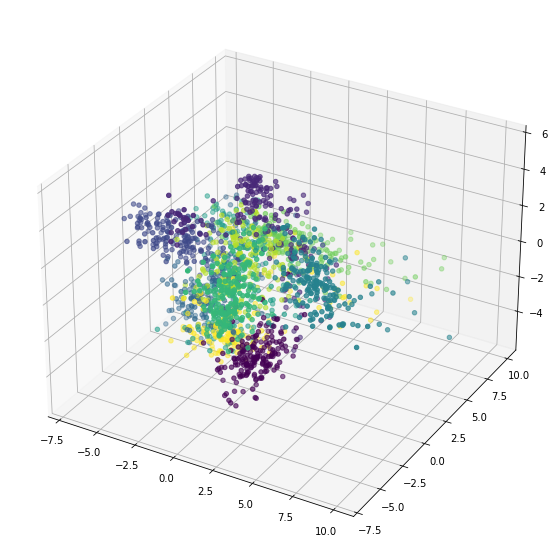

In [75]:
colors = np.random.rand(1797)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pca5[:,0], X_pca5[:,1], X_pca5[:,2], c = y)
#plt.scatter(X_pca5[:,0], X_pca5[:,1], X_pca5[:,2], c=y, edgecolor='none', alpha=.7, s=40)
#plt.colorbar()
plt.show()

In [92]:
# Consigna 7
kmeans = KMeans(n_clusters = 10, n_init = 100, random_state = 1)
kmeans.fit(X_pca)
cluster_labels=kmeans.labels_
print(cluster_labels)

[1 3 3 ... 3 6 6]


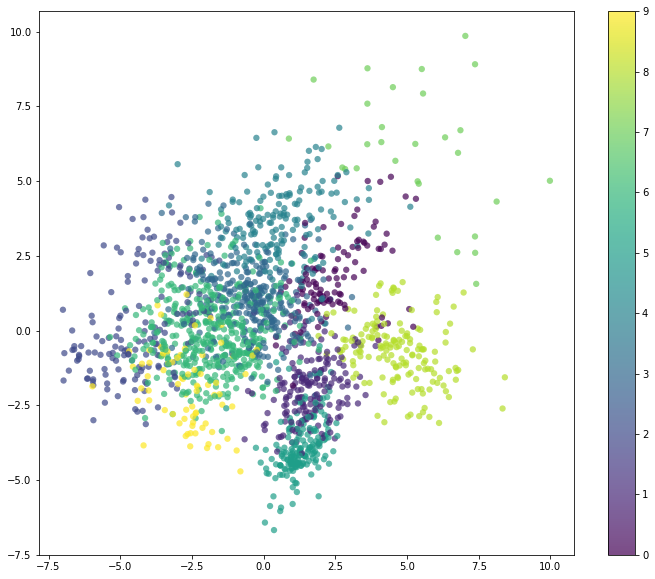

In [93]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:,0], X_pca[:,1],c=cluster_labels, edgecolor='none', alpha=.7, s=40)
plt.colorbar()

In [99]:
# Consigna 8
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init = 100, random_state=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

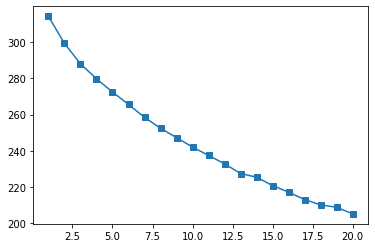

In [100]:
plt.plot(range(1,21), inertia, marker='s')

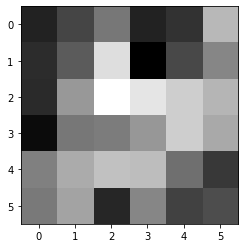

In [114]:
# Consigna 9 (no entendí como retocar a mano para volver a encontrar la forma original)
pca36 = PCA(n_components = 36, random_state = 1).fit_transform(X_scaled)

ocho= pca36[8].reshape(6,6)
plt.imshow(ocho, cmap='gray')